# Lab 02 (2nd Aug,2023)

## Tasks:

- Develop a program to demonstrate the statistical descriptions, histogram, box plot, scatter plots, data distribution, identifying missing values, data imputation, outliers of your dataset?


- For above dataset, apply any built in regression / classfier to observe the model learning capacity. Revise your split strategy of dataset and compare the outputs in terms of accuracy / error having different splitting creteria (hold out, k fold, stratified k fold, loocv etc), change parameters and also observe the improvements in learning capacity of your model?

### Part 1 - Pre-available Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Preliminary data descriptions

In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


No null entries detected in dataset

Checking unique values for 'extracurricular activities' to confirm that only 'Yes' and 'No' exist

In [7]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

Converting Extracurricular activities to 0 and 1 for "No" and "Yes" respectively

In [8]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


Performing data visualizations to understand data 

/home/yodenharsh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


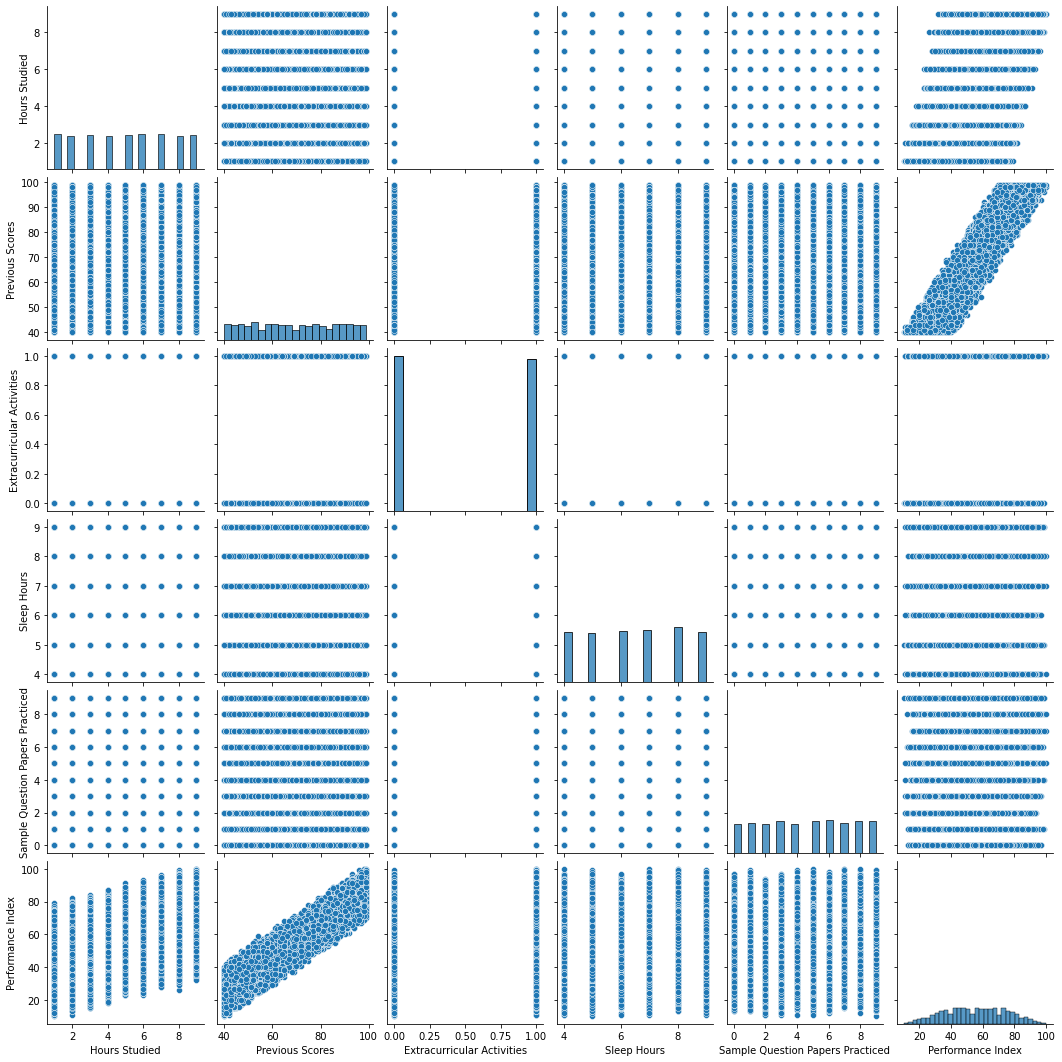

In [9]:
sns.pairplot(df)
plt.show()

/home/yodenharsh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


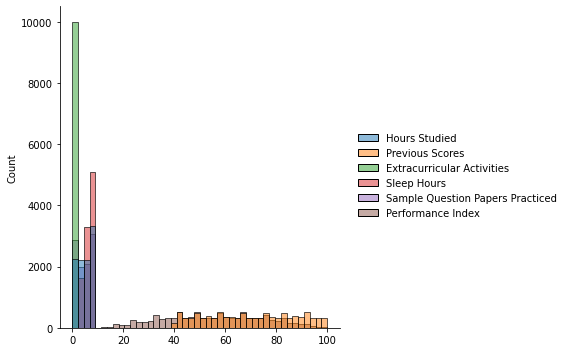

In [10]:
sns.displot(df)
plt.show()

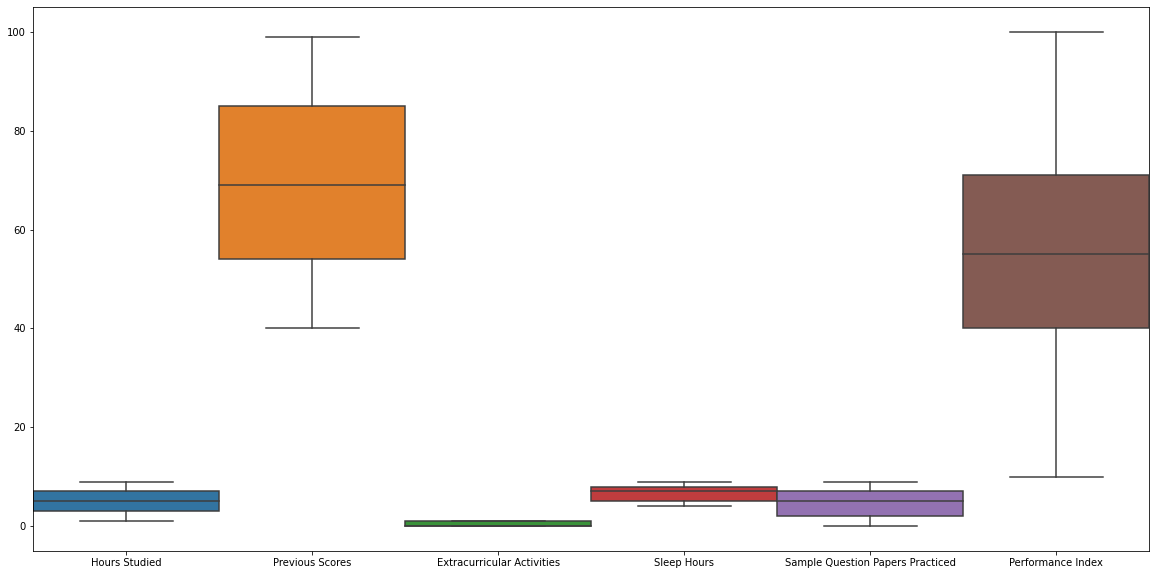

In [11]:

plt.figure(figsize=[20,10])

sns.boxplot(data=df,width=1.0)


plt.show()

We can notice that there are no outliers in the dataset

Next, we can analyze the distribution of performance index using a countplot

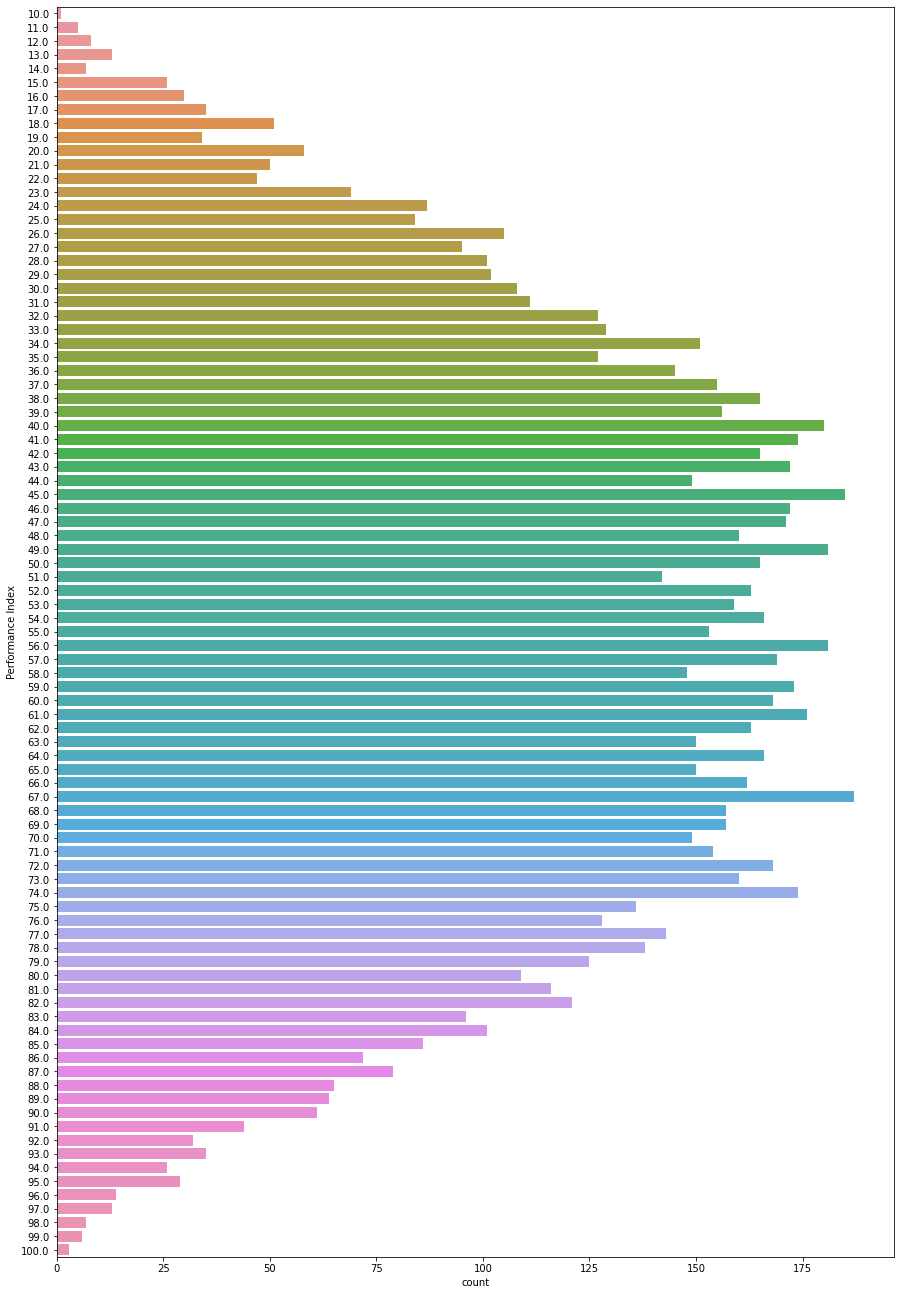

In [12]:
plt.figure(figsize=[15,23])


sns.countplot(data=df,y='Performance Index')
plt.show()

Next, we move on to performing linear regression to get a model that predicts the performance index based on the multiple parameters

Before actually applying the model, we split the model using holdout method

In [82]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model,metrics

x = df[['Previous Scores','Hours Studied']].to_numpy()
y = df['Performance Index']

x_train,x_test,y_train,y_test = train_test_split(x, y)




In [83]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)


mae = metrics.mean_absolute_error(y_true=y_test, y_pred=pred_test)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y_true=y_test, y_pred=pred_test)
print('Mean Squared Error:', mse)

r2 = metrics.r2_score(y_true=y_test, y_pred=pred_test)
print('R-squared:', r2)

Mean Absolute Error: 1.8224768641099058
Mean Squared Error: 5.254826999678336
R-squared: 0.9857862788944679


Splitting using k-fold cross validation and comparing results again

In [109]:
from sklearn.model_selection import KFold, cross_val_score

x = df[['Previous Scores','Hours Studied']]
y = df['Performance Index'].to_numpy()

cv = KFold(n_splits=4, shuffle=True)
reg = linear_model.LinearRegression()

scores = cross_val_score(reg, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
scores_mse = cross_val_score(reg, x, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

mae = np.mean(np.absolute(scores))
rmse = np.sqrt(np.mean(np.absolute(scores)))
mse = np.mean(np.absolute(scores_mse))

print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("R-Squared: ",rmse)   

Mean Absolute Error:  1.8184117929241566
Mean Squared Error:  5.217412663942957
R-Squared:  1.3484849991468784


### Part II - Self-made Synthetic dataset

Generating dataset

Two columns:

X: int, size=1000, range=1 to 700<br>
Y: int, size=1000, range=15 to 200

In [112]:
import numpy as np

X = np.random.randint(1,700,1000)
Y = np.random.randint(15,200,1000)

Writing to CSV

In [127]:
data = {
    'X': X,
    'Y': Y
}

df = pd.DataFrame(data=data)
df[1:].to_csv('synthetic_dataset.csv')

Reading that CSV to df
Also doing preliminary analysis

In [143]:
df = pd.read_csv('synthetic_dataset.csv')
df.describe()

,Unnamed: 0,X,Y
count,999.000000,999.000000,999.000000
mean,500.000000,335.810811,105.267267
std,288.530761,203.218747,53.720102
min,1.000000,1.000000,15.000000
25%,250.500000,153.500000,58.000000
50%,500.000000,331.000000,105.000000
75%,749.500000,501.500000,151.000000
max,999.000000,699.000000,199.000000


Removing index field

In [144]:
df = df.iloc[:,1:]
df

,X,Y
0,18,20
1,419,20
2,559,26
3,230,34
4,596,176
...,...,...
994,342,158
995,236,163
996,542,87
997,536,54


Performing data visualizations to understand data better

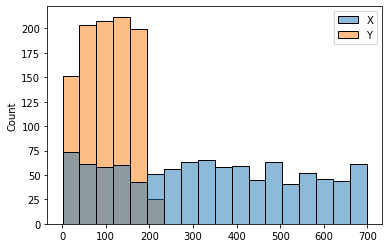

In [146]:
sns.histplot(data=df)
plt.show()  

<Axes: xlabel='X', ylabel='Y'>

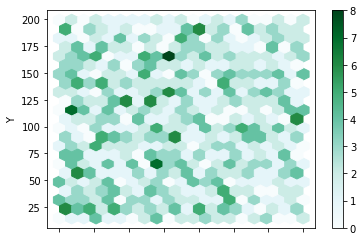

In [147]:
df.plot.hexbin(x='X',y='Y',gridsize=20)

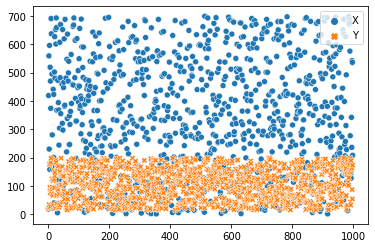

In [149]:
sns.scatterplot(data=df)
plt.show()

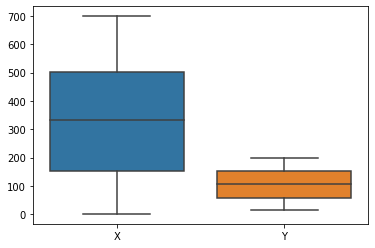

In [150]:
sns.boxplot(data=df)
plt.show()

From the above diagrams, we can notice that the data is split almost evenually from within the given range

Applying Linear Regression model to predict Y from X
Using holdout method to split model and measuring performance in the form of error

In [178]:
x = df['X'].to_numpy().reshape(-1, 1)
y = df['Y'].to_numpy()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)


mae = metrics.mean_absolute_error(y_true=y_test, y_pred=pred_test)
print('Mean Absolute Error:', mae)

mse = metrics.mean_squared_error(y_true=y_test, y_pred=pred_test)
print('Mean Squared Error:', mse)

r2 = metrics.r2_score(y_true=y_test, y_pred=pred_test)
print('R-squared:', r2)

Mean Absolute Error: 45.52577531781722
Mean Squared Error: 2839.2323557212326
R-squared: -0.02236471757058811


Using LOOCV to split the dataset and applying model again

In [179]:
from sklearn.model_selection import LeaveOneOut


x = df['X'].to_numpy().reshape(-1, 1)
y = df['Y'].to_numpy()

mae_scores = []
mse_scores = []

loo = LeaveOneOut()

for train_idx, test_idx in loo.split(x):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    reg = linear_model.LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    mae_scores.append(metrics.mean_absolute_error(y_true=y_test, y_pred=pred_test))
    mse_scores.append(metrics.mean_squared_error(y_true=y_test, y_pred=pred_test))

avg_mae = sum(mae_scores) / len(list(loo.split(x)))
avg_mse = sum(mse_scores) / len(list(loo.split(x)))

print('Average Mean Absolute Error:', avg_mae)
print('Average Mean Squared Error:', avg_mse)


Average Mean Absolute Error: 46.594074207391174
Average Mean Squared Error: 2885.65483554989


Applying LOOCV gives better results. However, it is computationally more expensive (0.6s more) based on observations in Jupyter Notebook